# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hell-ville
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | tottori
Processing Record 4 of Set 1 | laojunmiao
Processing Record 5 of Set 1 | concepcion
Processing Record 6 of Set 1 | ahau
City not found. Skipping...
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | mogocha
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | langepas
Processing Record 13 of Set 1 | binh long
City not found. Skipping...
Processing Record 14 of Set 1 | bucovice
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | aioun
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | sinabang
P

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hell-ville,-13.4000,48.2667,300.60,77,100,1.90,MG,1704395979
1,geraldton,-28.7667,114.6000,298.38,36,0,11.83,AU,1704395979
2,tottori,35.5000,134.2333,278.33,79,0,3.48,JP,1704395931
3,laojunmiao,39.8333,97.7333,266.90,33,6,1.68,CN,1704395980
4,concepcion,-36.8270,-73.0498,293.04,73,0,6.17,CL,1704395867


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hell-ville,-13.4000,48.2667,300.60,77,100,1.90,MG,1704395979
1,geraldton,-28.7667,114.6000,298.38,36,0,11.83,AU,1704395979
2,tottori,35.5000,134.2333,278.33,79,0,3.48,JP,1704395931
3,laojunmiao,39.8333,97.7333,266.90,33,6,1.68,CN,1704395980
4,concepcion,-36.8270,-73.0498,293.04,73,0,6.17,CL,1704395867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

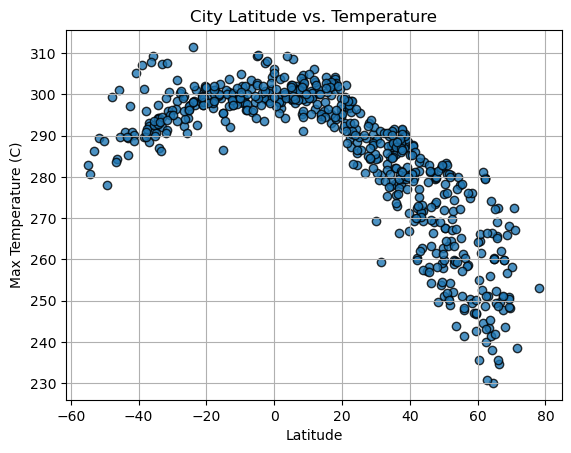

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

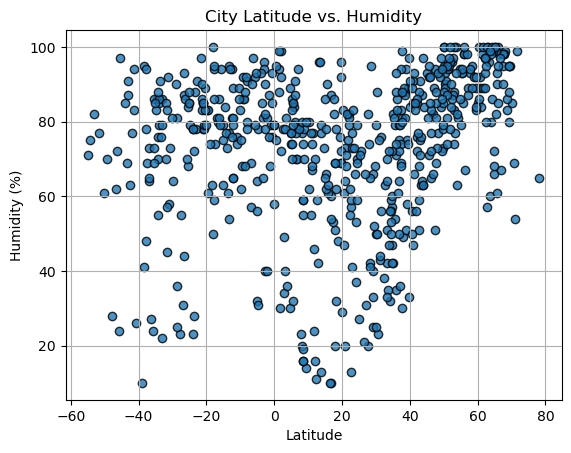

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

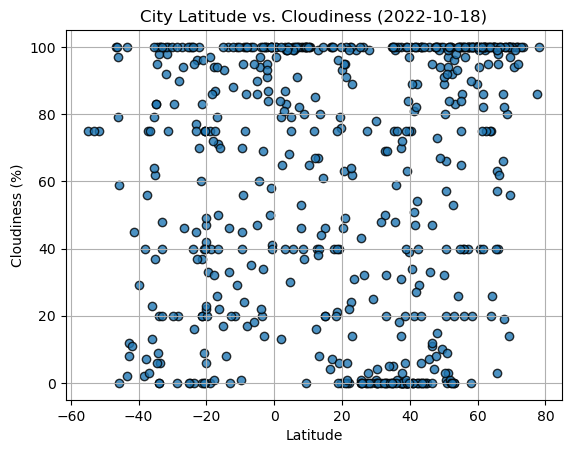

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

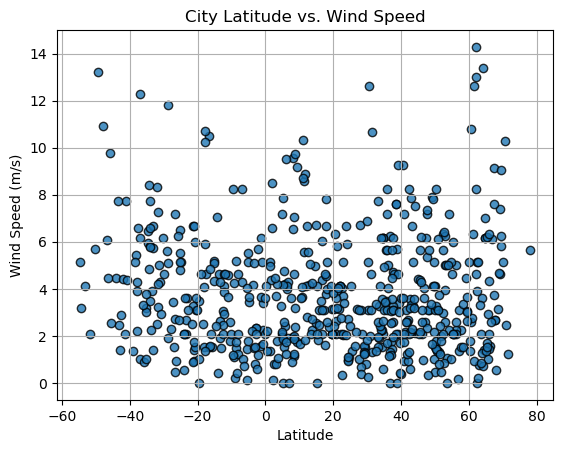

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tottori,35.5000,134.2333,278.33,79,0,3.48,JP,1704395931
3,laojunmiao,39.8333,97.7333,266.90,33,6,1.68,CN,1704395980
5,udachny,66.4167,112.4000,234.74,98,71,1.57,RU,1704395880
8,mogocha,53.7333,119.7667,243.92,100,33,1.07,RU,1704395981
10,langepas,61.2544,75.2124,252.55,98,100,6.32,RU,1704395982


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hell-ville,-13.4000,48.2667,300.60,77,100,1.90,MG,1704395979
1,geraldton,-28.7667,114.6000,298.38,36,0,11.83,AU,1704395979
4,concepcion,-36.8270,-73.0498,293.04,73,0,6.17,CL,1704395867
6,waitangi,-43.9535,-176.5597,290.83,85,100,4.47,NZ,1704395981
7,adamstown,-25.0660,-130.1015,296.46,85,73,5.53,PN,1704395981


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8725807836298346


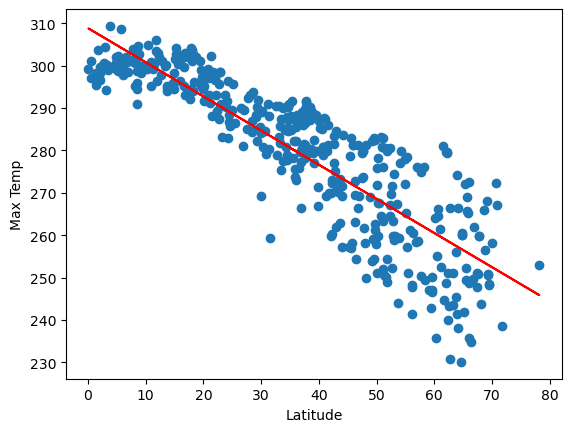

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is {rvalue}')



The r-value is 0.5868582896530699


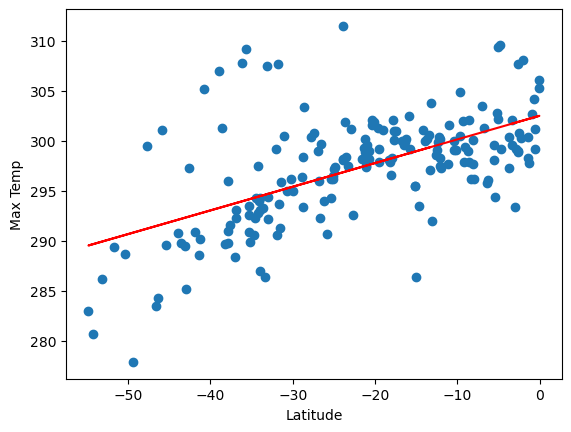

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.44392708043484147


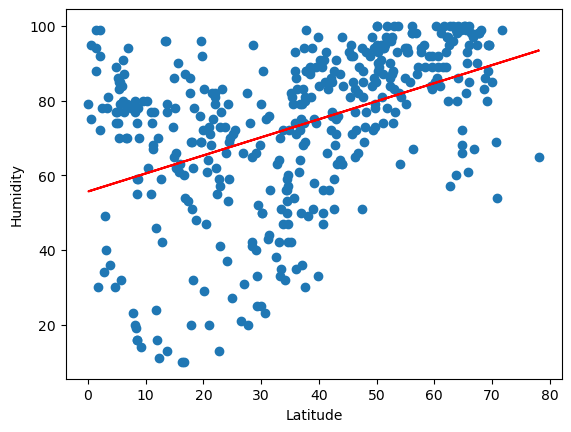

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is {rvalue}')

The r-value is 0.18829641413154957


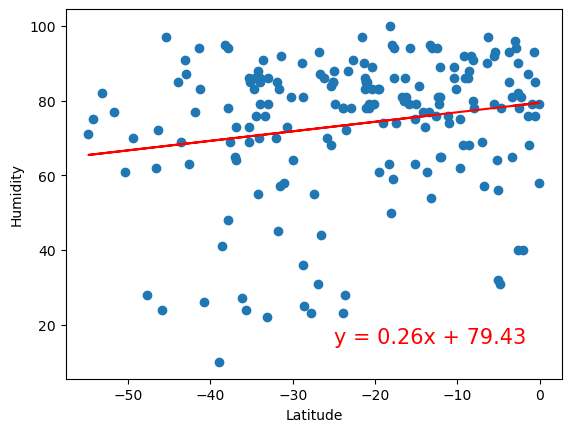

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.23422799384825824


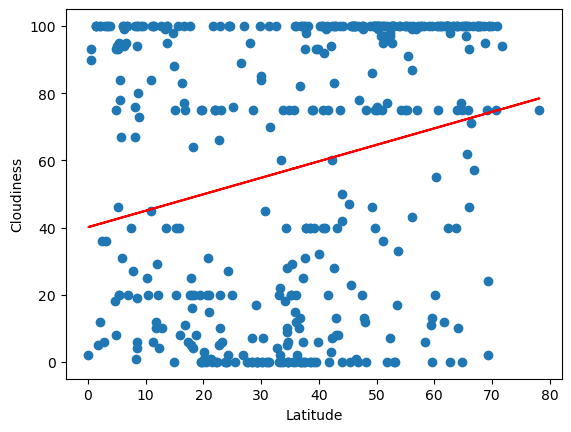

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is {rvalue}')

The r-value is 0.12448474829029119


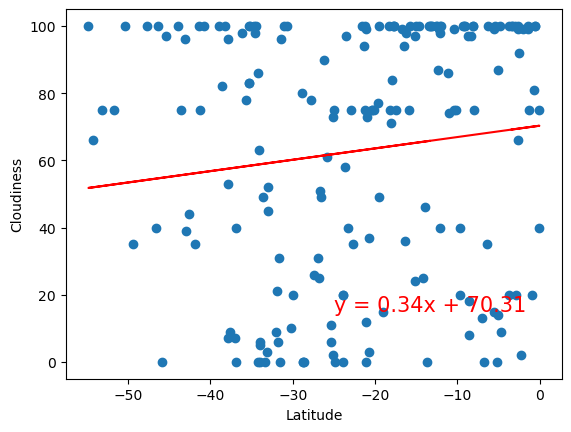

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.05011709156157446


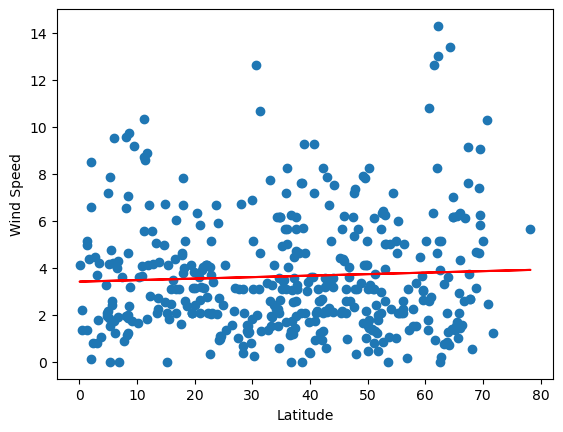

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is {rvalue}')

The r-value is -0.3059573856272398


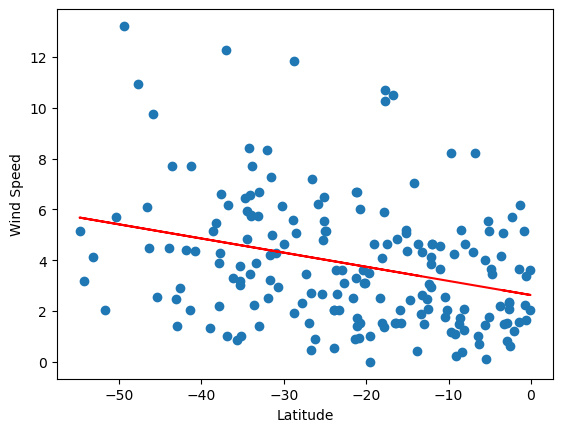

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE